# DCGAN - Deep Convolutional GANs

**Deep Convolutional Generative Adversarial Networks (DCGANs)** represent a class of Generative Adversarial Networks (GANs) that specifically use convolutional neural networks (CNNs) in their architecture. Introduced by Alec Radford, Luke Metz, and Soumith Chintala in 2015, DCGANs have been a significant advancement in the field of deep learning, particularly in generating high-quality synthetic images.

### Overview of GANs

Before diving into DCGANs, it's essential to understand the basic structure and concept of GANs:

- **Generative Adversarial Networks (GANs)** are composed of two neural networks — a **generator** and a **discriminator** — that compete in a game-like scenario.
- The **generator** tries to create data (like images) that look similar to the real data, attempting to fool the discriminator.
- The **discriminator** evaluates data presented to it and tries to determine whether it's real (from the training set) or fake (created by the generator).
- Both networks train simultaneously: the generator improving its ability to produce realistic data, and the discriminator getting better at telling real data from fake.

### Architecture of DCGANs

DCGANs make specific architectural choices to improve the training stability and quality of the generated images:

1. **Use of Convolutional Layers**: Unlike traditional GANs that may use fully connected layers, DCGANs exclusively use convolutional layers in the discriminator and transposed convolutional layers (often called deconvolutional layers) in the generator.

2. **Batch Normalization**: Both the generator and discriminator use batch normalization. This helps in stabilizing the learning process and reduces the chances of the model getting stuck in poor solutions.

3. **Activation Functions**:
   - The generator uses **ReLU activation** for all layers except for the output, which uses the **tanh activation** function to produce normalized pixel values.
   - The discriminator uses **LeakyReLU activation** for all layers, which allows a small gradient when the unit is inactive and improves the gradients flow through the network.

4. **Eliminating Fully Connected Hidden Layers**: DCGAN architectures remove any fully connected hidden layers, relying on convolutional strides for downsampling in the discriminator and upsampling in the generator.

5. **No Pooling Layers**: Pooling operations are replaced by strided convolutions in the discriminator and fractional-strided convolutions in the generator, which help learn spatial hierarchies more effectively.

### Training and Challenges

- **Training Process**: During training, the discriminator and generator are updated alternately. This training continues until the discriminator is sufficiently good at distinguishing real from fake, and the generator is good at creating convincing fakes.
- **Challenges**: Like all GANs, DCGANs can suffer from training instability, mode collapse (where the generator produces limited varieties of samples), and convergence issues.

### Applications

Due to their efficiency in learning high-quality representations of images, DCGANs have been used in various applications, including:
- **Image synthesis and manipulation**
- **Feature learning** for unsupervised and semi-supervised tasks
- **Super-resolution imaging**

DCGANs marked a significant step forward in the practical application of GANs by demonstrating that deep convolutional networks can be effectively trained in adversarial settings. Their principles have influenced many subsequent variations and improvements in the GAN landscape.

# Importing the libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
tf.__version__

'2.15.0'

# Loading and preprocessing the dataset

In [ ]:
(X_train, y_train), (_, _) = tf.keras.datasets.mnist.load_data()

  573440/11490434 [>.............................] - ETA: 8s 

In [ ]:
X_train.shape

In [ ]:
28 * 28

In [ ]:
y_train.shape

In [ ]:
i = np.random.randint(0, 60000)
#print(i)
print(y_train[i])
plt.imshow(X_train[i], cmap='gray');

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')

In [ ]:
X_train.shape

In [ ]:
X_train[0].min(), X_train[0].max()

In [ ]:
X_train = (X_train - 127.5) / 127.5

In [ ]:
X_train[0].min(), X_train[0].max()

In [ ]:
buffer_size = 60000
batch_size = 256

In [ ]:
buffer_size / batch_size # mini-batch

In [ ]:
type(X_train)

In [ ]:
X_train = tf.data.Dataset.from_tensor_slices(X_train).shuffle(buffer_size).batch(batch_size)

In [ ]:
type(X_train)

In [ ]:
X_train

# Building the generator

- Batch normalization: https://keras.io/api/layers/normalization_layers/batch_normalization/
- Leaky Relu: https://keras.io/api/layers/activation_layers/leaky_relu/
- Funções de ativação: https://medium.com/@himanshuxd/activation-functions-sigmoid-relu-leaky-relu-and-softmax-basics-for-neural-networks-and-deep-8d9c70eed91e
- Padding: https://www.pico.net/kb/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-tensorflow

In [ ]:
7 * 7 * 256

In [ ]:
# 100 -> 12544
def build_generator():
  network = tf.keras.Sequential()

  network.add(layers.Dense(units = 7*7*256, use_bias = False, input_shape=(100,)))
  network.add(layers.BatchNormalization())
  network.add(layers.LeakyReLU())

  network.add(layers.Reshape((7,7,256)))

  # 7x7x128
  network.add(layers.Conv2DTranspose(filters = 128, kernel_size = (5,5), padding = 'same', use_bias = False))
  network.add(layers.BatchNormalization())
  network.add(layers.LeakyReLU())

  # 14x14x64
  network.add(layers.Conv2DTranspose(filters = 64, kernel_size = (5,5), padding = 'same', strides = (2,2), use_bias = False))
  network.add(layers.BatchNormalization())
  network.add(layers.LeakyReLU())

  # 28x28x1
  network.add(layers.Conv2DTranspose(filters = 1, kernel_size = (5,5), padding = 'same', strides = (2,2), use_bias=True, activation='tanh'))

  network.summary()

  return network

In [ ]:
generator = build_generator()

In [ ]:
generator.input

In [ ]:
noise = tf.random.normal([1, 100])
noise

The model provided is the architecture of a generator from a Deep Convolutional Generative Adversarial Network (DCGAN) designed to generate images. This particular setup appears to be targeted at generating images of a size similar to the MNIST dataset (28x28 pixels). Here's a step-by-step breakdown of each layer and its function within the model:

### 1. Dense Layer
- **Type**: Dense
- **Output Shape**: (None, 12544)
- **Parameters**: 1,254,400
- **Function**: This fully connected layer takes the input (likely a random noise vector) and maps it into a higher-dimensional space. The output dimension, 12544, is chosen to be reshaped into a more manageable format for convolutional layers that follow.

### 2. Batch Normalization
- **Type**: Batch Normalization
- **Output Shape**: (None, 12544)
- **Parameters**: 50,176
- **Function**: Normalizes the output of the previous layer by adjusting and scaling activations, which helps in stabilizing the learning process by reducing internal covariate shift.

### 3. LeakyReLU
- **Type**: Leaky ReLU
- **Output Shape**: (None, 12544)
- **Parameters**: 0
- **Function**: Applies the Leaky Rectified Linear Unit activation function, which allows a small gradient when the unit is inactive (leakage). This can help to maintain the flow of gradients during training and prevent the dying ReLU problem.

### 4. Reshape
- **Type**: Reshape
- **Output Shape**: (None, 7, 7, 256)
- **Parameters**: 0
- **Function**: Reshapes the flat output from previous layers into a 4D tensor to prepare for convolutional operations. The target shape mimics an image format (height, width, channels).

### 5. Conv2D Transpose Layers
- **Layers**: Multiple (3 layers)
- **Output Shapes**:
  - First layer: (None, 7, 7, 128)
  - Second layer: (None, 14, 14, 64)
  - Third layer: (None, 28, 28, 1)
- **Parameters**: Varies per layer, totaling significant amounts for feature learning through up-sampling.
- **Function**: These layers perform transposed convolutions (sometimes referred to as fractionally-strided convolutions or deconvolutions) which upsample the spatial dimensions of the input volume. As the model progresses through these layers, the spatial dimensions increase while the depth (or number of channels) decreases. The first two transposed convolutions expand the feature maps and refine details, while the final layer maps the refined features into a single-channel output image.

### 6. More Batch Normalization and LeakyReLU
- **Function**: Additional batch normalization and LeakyReLU layers follow each transposed convolution (except the last one) to aid in training stability and non-linearity introduction.

### 7. Final Conv2D Transpose Layer
- **Output Shape**: (None, 28, 28, 1)
- **Parameters**: 1,601
- **Function**: The final layer generates the output image with the expected dimensions of 28x28 pixels. This layer typically uses a tanh or sigmoid activation (not listed here), which constrains the output pixel values to a standard range (e.g., -1 to 1 or 0 to 1).

### Summary
This generator model systematically expands a random input vector into a full-resolution image through a series of transformations and upscaling steps. The architecture is carefully designed to gradually shape and refine the generated output, simulating realistic image generation in the process of learning from training data. The model is highly parameterized, with most parameters devoted to learning complex features and patterns in the image data, indicative of typical GAN generator complexity.

In [ ]:
generated_image = generator(noise, training = False)

In [ ]:
generated_image.shape

In [ ]:
plt.imshow(generated_image[0, :,:,0], cmap='gray');

# Building the discriminator

- Dropout: https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf
- Conv2d x Conv2dTranspose: https://stackoverflow.com/questions/68976745/in-keras-what-is-the-difference-between-conv2dtranspose-and-conv2d

In [ ]:
def build_discriminator():
  network = tf.keras.Sequential()

  # 14x14x64
  network.add(layers.Conv2D(filters = 64, strides = (2,2), kernel_size = (5,5), padding = 'same', input_shape = [28,28,1]))
  network.add(layers.LeakyReLU())
  network.add(layers.Dropout(0.3))

  # 7x7x128
  network.add(layers.Conv2D(filters = 128, strides = (2,2), kernel_size = (5,5), padding = 'same'))
  network.add(layers.LeakyReLU())
  network.add(layers.Dropout(0.3))

  network.add(layers.Flatten())
  network.add(layers.Dense(1))

  network.summary()

  return network

In [ ]:
7 * 7 * 128

In [ ]:
discriminator = build_discriminator()

The model you is the architecture of a **discriminator** in a Deep Convolutional Generative Adversarial Network (DCGAN). It's designed to differentiate between real and generated (fake) images. Here’s a breakdown of each layer in the model and their functions:

### 1. Conv2D
- **Type**: Conv2D
- **Output Shape**: (None, 14, 14, 64)
- **Parameters**: 1,664
- **Function**: This convolutional layer applies 64 filters to the input image, reducing its spatial dimensions (from 28x28 to 14x14 if the input is assumed to be 28x28). It helps to extract low-level features such as edges from the input images.

### 2. LeakyReLU
- **Type**: LeakyReLU
- **Output Shape**: (None, 14, 14, 64)
- **Parameters**: 0
- **Function**: Applies the Leaky Rectified Linear Unit activation function which allows a small, non-zero gradient when the unit is not active, thus preventing the dying ReLU problem.

### 3. Dropout
- **Type**: Dropout
- **Output Shape**: (None, 14, 14, 64)
- **Parameters**: 0
- **Function**: Randomly sets a fraction of the input units to 0 at each update during training time, which helps prevent overfitting.

### 4. Conv2D
- **Type**: Conv2D
- **Output Shape**: (None, 7, 7, 128)
- **Parameters**: 204,928
- **Function**: A second convolutional layer that further reduces the spatial dimension of the feature maps while increasing the depth to 128. This layer extracts higher-level features from the input provided by the previous layers.

### 5. LeakyReLU
- **Type**: LeakyReLU
- **Output Shape**: (None, 7, 7, 128)
- **Parameters**: 0
- **Function**: Again applies LeakyReLU to introduce non-linearity, helping the network learn more complex patterns.

### 6. Dropout
- **Type**: Dropout
- **Output Shape**: (None, 7, 7, 128)
- **Parameters**: 0
- **Function**: Another dropout layer to further prevent overfitting, especially important as the model's complexity increases with deeper layers.

### 7. Flatten
- **Type**: Flatten
- **Output Shape**: (None, 6272)
- **Parameters**: 0
- **Function**: Flattens the 3D output of previous layers into a 1D vector, preparing it for the final classification step. This is crucial as the next layer, a dense layer, requires a 1D input.

### 8. Dense
- **Type**: Dense
- **Output Shape**: (None, 1)
- **Parameters**: 6,273
- **Function**: This fully connected layer outputs a single value representing the discriminator's assessment of whether the input image is real or fake. Typically, this output would be passed through a sigmoid activation function to squish the output into a range between 0 and 1, indicating the probability of the input being real.

### Summary
The discriminator is crucial for a GAN's training process, where it learns to distinguish real images from fakes generated by the generator. It uses convolutional layers to extract features, interspersed with non-linearity (LeakyReLU) and regularization (Dropout), culminating in a classification decision through a dense layer. The effectiveness of a GAN heavily relies on the discriminator's ability to challenge the generator, pushing it to create ever more realistic images.

In [ ]:
discriminator.input

In [ ]:
discriminator(generated_image, training = False) # logits

In [ ]:
tf.sigmoid(-0.00081761)

# Error calculation

- Logits: https://deepai.org/machine-learning-glossary-and-terms/logit

This method quantifies how well the discriminator is able to distinguish real images from fakes images. It compares the discriminator predictions on real images with an array of 1s and the discriminator predictions on fake (generated) images with an array of 0s.

In [ ]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits = True)

In [ ]:
tf.ones_like(1)

In [ ]:
def discriminator_loss(expected_output, fake_output):
  real_loss = cross_entropy(tf.ones_like(expected_output), expected_output)
  fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
  total_loss = real_loss + fake_loss
  return total_loss

In [ ]:
def generator_loss(fake_output):
  return cross_entropy(tf.ones_like(fake_output), fake_output)

In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00001)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00001)

# Training the GAN and visualizing the results

- Based on the summary: https://www.tensorflow.org/beta/tutorials/generative/dcgan
- @tf.function: https://www.tensorflow.org/guide/function#:~:text=You%20can%20use%20tf.,is%20required%20to%20use%20SavedModel%20.


In [ ]:
X_train

In [ ]:
epochs = 100
noise_dimension = 100
number_of_images = 16

In [ ]:
batch_size, noise_dimension

In [ ]:
@tf.function
def train(images):
  noise = tf.random.normal([batch_size, noise_dimension])
  #print(noise.shape)
  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    generated_images = generator(noise, training = True)

    expected_output = discriminator(images, training = True)
    fake_output = discriminator(generated_images, training = True)

    gen_loss = generator_loss(fake_output)
    disc_loss = discriminator_loss(expected_output, fake_output)

  generator_gradients = gen_tape.gradient(gen_loss, generator.trainable_variables)
  discriminator_gradients = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

  generator_optimizer.apply_gradients(zip(generator_gradients, generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(discriminator_gradients, discriminator.trainable_variables))

In [ ]:
tf.config.run_functions_eagerly(True)
X_train_batch = X_train.as_numpy_iterator().next()
train(X_train_batch)

In [ ]:
test_images = tf.random.normal([number_of_images, noise_dimension])
test_images.shape

TensorShape([16, 100])

In [ ]:
60000 / 256

234.375

In [ ]:
def train_gan(dataset, epochs, test_images):
  for epoch in range(epochs):
    #print(epoch)
    for image_batch in dataset:
      #print(image_batch.shape)
      train(image_batch)

    print('Epoch: ', epoch + 1)
    generated_images = generator(test_images, training = False)
    fig = plt.figure(figsize = (10,10))
    for i in range(generated_images.shape[0]):
      plt.subplot(4,4,i + 1)
      plt.imshow(generated_images[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')
    plt.show()

Epoch:  1


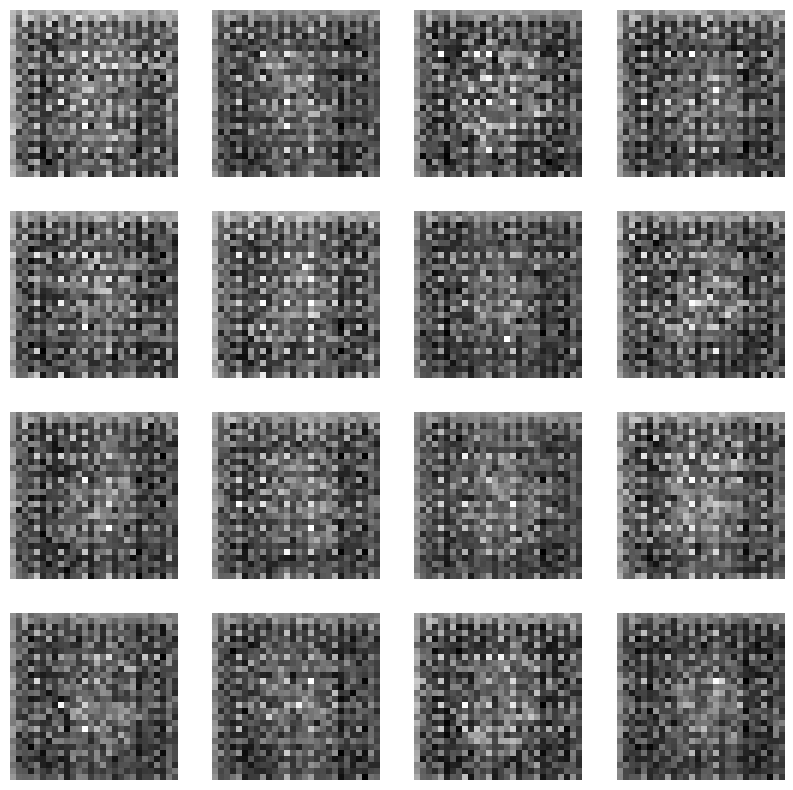

Epoch:  2


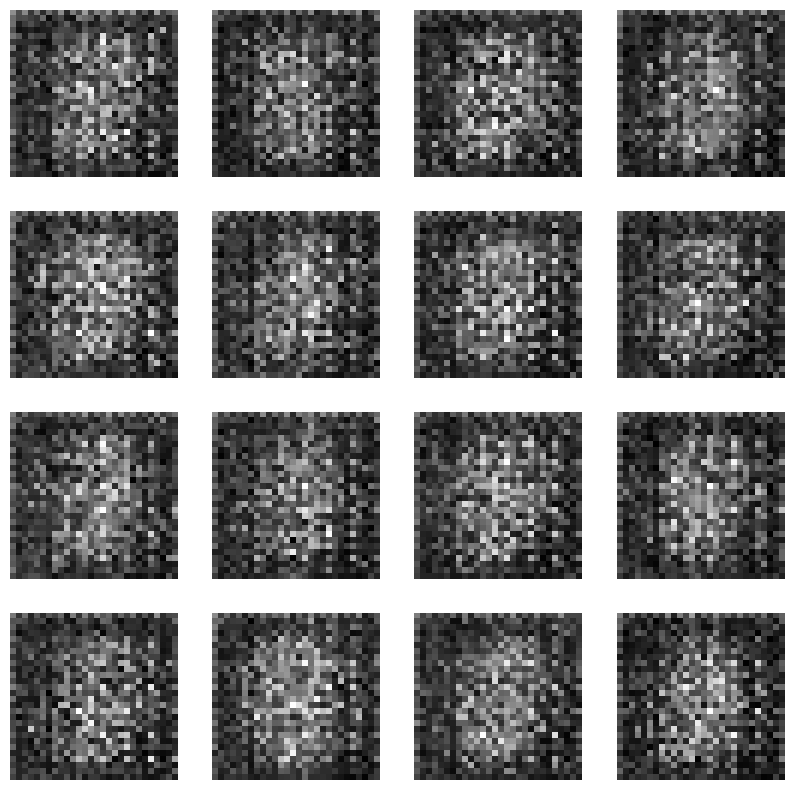

Epoch:  3


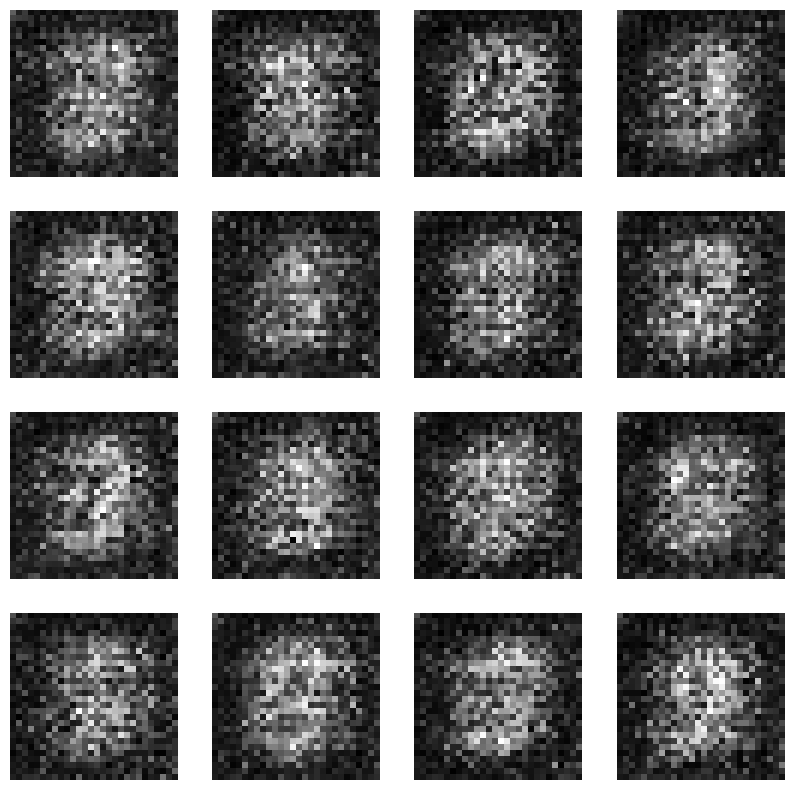

Epoch:  4


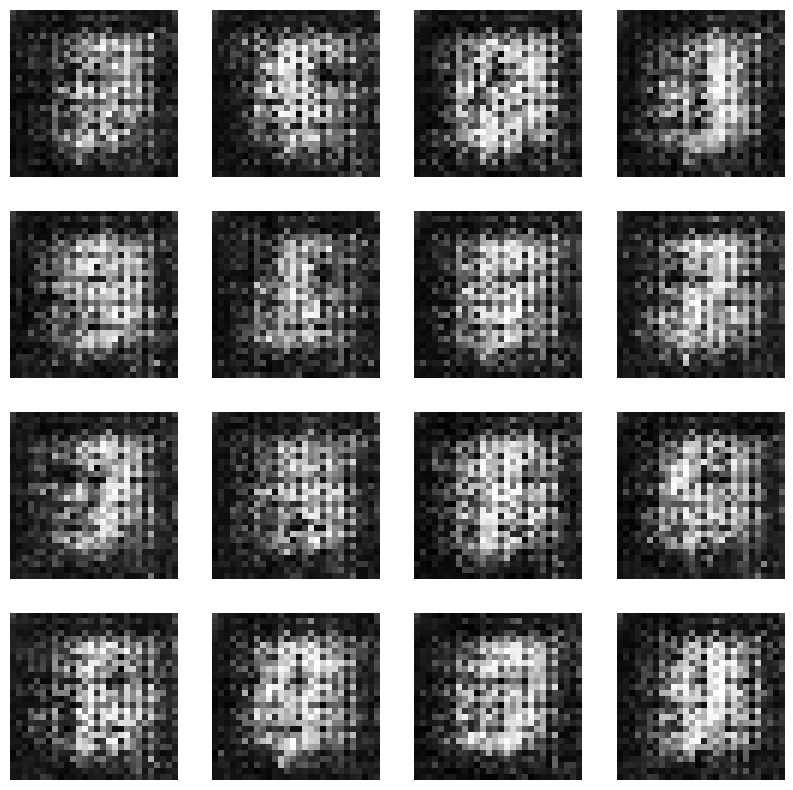

In [ ]:
train_gan(X_train, epochs, test_images)

MIT License Copyright (c) 2024 Riya Mate
Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE